# Applying Binary Classification with Logistic Regression

___

## The Problem : Spam Classification
Here we will discuss generalizing linear regression to support classification tasks. We combine a model called
logistic regression with some of the feature engineering techniques to create a spam filter

We will extract TF-IDF features from the messages using Feature Extraction and Preprocessing techniques, and classify the spam and ham messages using logistic regression.

## The Data Set: 
We will use the SMS Spam Classification Data Set from the UCI Machine Learning Repository. The dataset can be downloaded from http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection.

This SMS Spam Collection is a public set of SMS labeled messages that have been collected for mobile phone spam research.



## Exploring the Data using Pandas

In [2]:
import pandas as pd
df = pd.read_csv('datasets/SMSSpamCollection', delimiter='\t', header=None)
print df.head()

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
print 'Number of spam messages:', df[df[0] == 'spam'][0].count()
print 'Number of ham messages:', df[df[0] == 'ham'][0].count()
#The ham messages are labeled with zero, and the spam messages are labeled with one.

Number of spam messages: 747
Number of ham messages: 4825


## Using scikit-learn's LogisticRegression class to predict spam:

In [4]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

In [5]:
# Splitting the data into train-set and test-set
# train_test_split() assigns 75 percent of the samples to the training set and allocates the remaining 25 percent of the samples to the test set.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])

## Feature Extraction and Preprocessing
CountVectorizer: converts the characters in the documents to lowercase, and tokenizes the documents i.e. splits a string into tokens, or meaningful sequences of characters (which may include punctuation characters and affixes). The CountVectorizer class tokenizes using a regular expression that splits strings on whitespace and extracts sequences of characters that are two or more characters in length.

However using CountVectorizer to create feature vectors, any words might appear with the same frequency in two documents, but the documents to be examined could still be dissimilar, if one document is many times larger than
the other. 
scikit-learn's TfdfTransformer object can assess this problem by transforming a matrix of term frequency vectors into a matrix of normalized term frequency weights.

A term's TF-IDF value is the product of its term frequency and inverse document frequency (measure of how rare or common a word is in a corpus). TfidfTransformer returns TF-IDF's weight when its use_idf keyword argument is set to its default value, True. Since TF-IDF weighted feature vectors are commonly used to represent text, scikit-learn provides a TfidfVectorizer class that wraps CountVectorizer and TfidfTransformer.

## Creating a TfidfVectorizer:
We fit it with the training messages, and transform both the training and test messages:

In [6]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [7]:
# Finally, we create an instance of LogisticRegression and train our model.
# Like LinearRegression, LogisticRegression implements the fit() and predict() methods. 
# As a sanity check, we printed a few predictions for manual inspection:

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [8]:
for i, prediction in enumerate(predictions[:5]):
    print 'Prediction: %s. Message: %s' % (prediction, X_test_raw.iloc[i])

Prediction: ham. Message: She.s good. She was wondering if you wont say hi but she.s smiling now. So how are you coping with the long distance
Prediction: ham. Message: Oh god. I'm gonna Google nearby cliffs now.
Prediction: ham. Message: Boy you best get yo ass out here quick
Prediction: ham. Message: If you're not in my car in an hour and a half I'm going apeshit
Prediction: ham. Message: Got what it takes 2 take part in the WRC Rally in Oz? U can with Lucozade Energy! Text RALLY LE to 61200 (25p), see packs or lucozade.co.uk/wrc & itcould be u!


## Measuring our classifier using Binary classification performance metrics
A variety of metrics exist to evaluate the performance of binary classifiers against
trusted labels. The most common metrics are accuracy, precision, recall, F1 measure,
and ROC AUC score. All of these measures depend on the concepts of true positives,
true negatives, false positives, and false negatives. Positive and negative refer to the
classes. True and false denote whether the predicted class is the same as the true class.

For our SMS spam classifier, a true positive prediction is when the classifier correctly
predicts that a message is spam. A true negative prediction is when the classifier
correctly predicts that a message is ham. A prediction that a ham message is spam
is a false positive prediction, and a spam message incorrectly classified as ham is a
false negative prediction. A confusion matrix, or contingency table, can be used to
visualize true and false positives and negatives. The rows of the matrix are the true
classes of the instances, and the columns are the predicted classes of the instances:

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

[[4 1]
 [2 3]]


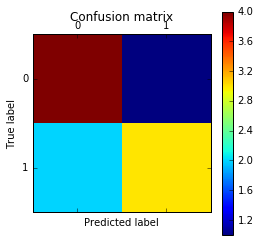

In [10]:
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix indicates that there were four true negative predictions, three
true positive predictions, two false negative predictions, and one false positive
prediction.

## Measuring accuracy of our classifier : 

In [11]:
#Accuracy measures a fraction of the classifier's predictions that are correct.
#scikit-learn provides a function accuracy_score() to calculate the accuracy of a set of predictions given the correct labels:

from sklearn.metrics import accuracy_score
y_pred, y_true = [0, 1, 1, 0], [1, 1, 1, 1]
print 'Accuracy:', accuracy_score(y_true, y_pred)

Accuracy: 0.5


### LogisticRegression.score() predicts and scores labels for a test set using accuracy. Let's evaluate our classifier's accuracy:

In [12]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
df = pd.read_csv('datasets/sms.csv')
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print np.mean(scores), scores

0.957176701116 [ 0.96057348  0.95937873  0.94736842  0.95688623  0.96167665]


___

While accuracy measures the overall correctness of the classifier, it does not distinguish between false positive errors and false negative errors. Some applications may be more sensitive to false negatives than false positives, or vice
versa. Furthermore, accuracy is not an informative metric if the proportions of the classes are skewed in the population. For example, a classifier that predicts whether or not credit card transactions are fraudulent may be more sensitive to
false negatives than to false positives.

A classifier that always predicts that transactions are legitimate could have a high accuracy score, but would not be useful. For these reasons, classifiers are often evaluated using two additional measures called precision and recall.
___

## Precision and Recall:
Precision is the
fraction of positive predictions that are correct. For instance, in our SMS spam
classifier, precision is the fraction of messages classified as spam that are actually
spam. 

Precision is given by the following ratio:
####                                                     P = TP / (TP + FP) 

Sometimes called sensitivity in medical domains, recall is the fraction of the truly
positive instances that the classifier recognizes. A recall score of one indicates
that the classifier did not make any false negative predictions. For our SMS spam
classifier, recall is the fraction of spam messages that were truly classified as spam.

Recall is calculated with the following ratio:
#### R = TP / (TP + FN)

Individually, precision and recall are seldom informative; they are both incomplete
views of a classifier's performance. Both precision and recall can fail to distinguish
classifiers that perform well from certain types of classifiers that perform poorly. A
trivial classifier could easily achieve a perfect recall score by predicting positive for
every instance. For example, assume that a test set contains ten positive examples
and ten negative examples. 

A classifier that predicts positive for every example will
achieve a recall of one, as follows:
#### R = 10 / (10 + 0) = 1

A classifier that predicts negative for every example, or that makes only false positive
and true negative predictions, will achieve a recall score of zero. Similarly, a classifier
that predicts that only a single instance is positive and happens to be correct will
achieve perfect precision.

Scikit-learn provides a function to calculate the precision and recall for a classifier
from a set of predictions and the corresponding set of trusted labels. 

### Calculating our SMS classifier's precision and recall:

In [13]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
df = pd.read_csv('datasets/sms.csv')
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
precisions = cross_val_score(classifier, X_train, y_train, cv=5,scoring='precision')
print 'Precision', np.mean(precisions), precisions
recalls = cross_val_score(classifier, X_train, y_train, cv=5,scoring='recall')
print 'Recalls', np.mean(recalls), recalls

Precision 0.987825497288 [ 1.          0.9875      1.          0.96428571  0.98734177]
Recalls 0.705397301349 [ 0.71551724  0.68103448  0.74782609  0.70434783  0.67826087]


Our classifier's precision is 0.992; almost all of the messages that it predicted as
spam were actually spam. Its recall is lower, indicating that it incorrectly classified
approximately 22 percent of the spam messages as ham.

___

## Calculating the F1 measure

The F1 measure is the harmonic mean, or weighted average, of the precision and
recall scores. Also called the f-measure or the f-score, the F1 score is calculated using
the following formula:

#### F1 = 2PR / (P + R)

The F1 measure penalizes classifiers with imbalanced precision and recall scores,
like the trivial classifier that always predicts the positive class. A model with perfect
precision and recall scores will achieve an F1 score of one. A model with a perfect
precision score and a recall score of zero will achieve an F1 score of zero. As for
precision and recall, scikit-learn provides a function to calculate the F1 score for
a set of predictions. Let's compute our classifier's F1 score.

In [14]:
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print 'F1', np.mean(f1s), f1s

F1 0.822841751877 [ 0.83417085  0.80612245  0.85572139  0.81407035  0.80412371]


The arithmetic mean of our classifier's precision and recall scores is 0.804. As the
difference between the classifier's precision and recall is small, the F1 measure's
penalty is small. Models are sometimes evaluated using the F0.5 and F2 scores,
which favor precision over recall and recall over precision, respectively.

## ROC AUC
A Receiver Operating Characteristic, or ROC curve, visualizes a classifier's performance. Unlike accuracy, the ROC curve is insensitive to data sets with unbalanced class proportions; unlike precision and recall, the ROC curve illustrates the classifier's performance for all values of the discrimination threshold. ROC curves plot the classifier's recall against its fall-out. Fall-out, or the false positive rate, is the number of false positives divided by the total number of negatives. It is
calculated using the following formula:
#### F = FP / (TN + FP)
____

### Plotting the ROC curve for our SMS spam classifier:

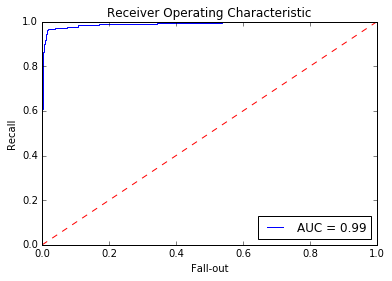

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
df = pd.read_csv('datasets/sms.csv')
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'])
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict_proba(X_test)

false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

From the ROC AUC plot, it is apparent that our classifier outperforms random
guessing; most of the plot area lies under its curve.
___

## Summary:
Thus logistic regression is a generalized linear model that uses the logistic
link function to relate explanatory variables to a Bernoulli-distributed response
variable. Logistic regression can be used for binary classification, a task in which an
instance must be assigned to one of the two classes. Here we used logistic regression to
classify spam and ham SMS messages.